## 📌 Poisson Probability Mass Function (PMF)
#### How do you pronounce it?: <i> pwuh-saan </i>

The Poisson distribution models the number of times an event occurs in a fixed interval of time or space, given a constant average rate (λ), and the events are independent of each other.

🔢 Formula:

The Poisson PMF is given by:

$$
P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}
$$

Where:

* X = number of occurrences (discrete, 0, 1, 2, ...)
* λ = average rate (mean number of occurrences in the interval)
* e = Euler’s number (≈ 2.718)
* k! = factorial of k

_____________________

### 🎯 Real-World Example:

#### Call Center Scenario
* A call center receives an average of 4 calls per minute.

You want to know:
* 👉 What’s the probability that exactly 6 calls come in a particular minute?

In [3]:
from scipy.stats import poisson

# Average rate (λ) of calls per minute
lambda_rate = 4

# Desired number of calls
k = 6

# Poisson PMF: Probability of exactly k calls
probability = poisson.pmf(k, mu=lambda_rate)

print(f"Probability of receiving exactly {k} calls in a minute: {probability:.4f}")


Probability of receiving exactly 6 calls in a minute: 0.1042


👉 So, there's about a 10.4% chance of getting exactly 6 calls in a minute.

__________

###  🎯 Now let's use the PMF: Probability Mass Function 
to get point estimates for various number of calls from 0 calls to 15 calls in the next minute, considering the average calls per minute is 4. And plot them into stems.

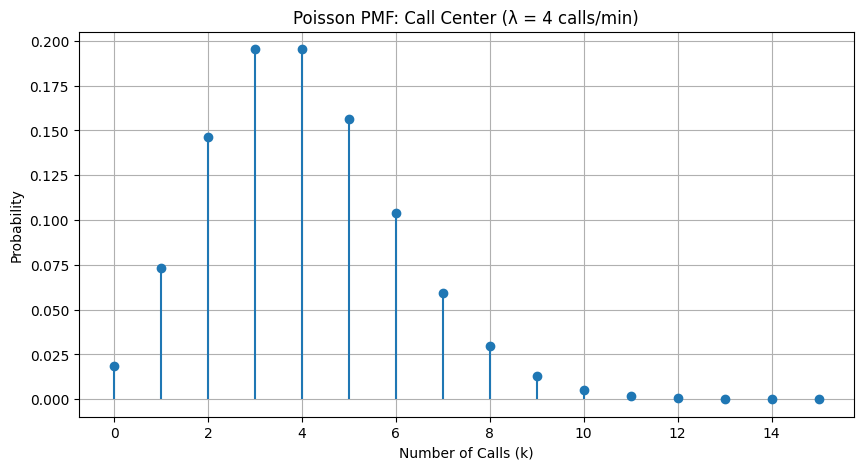

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Range of k values (number of calls)
k_values = np.arange(0, 16)
pmf_values = poisson.pmf(k_values, mu=lambda_rate)

# Plotting
plt.figure(figsize=(10, 5))
plt.stem(k_values, pmf_values, basefmt=" ")
plt.title('Poisson PMF: Call Center (λ = 4 calls/min)')
plt.xlabel('Number of Calls (k)')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

### 🧠 Key Points Recap:
* poisson.pmf(k, mu=λ) gives the probability of k events when average is λ.
* Used in situations where events occur randomly and independently over time or space.
### * For simulation or random generation, you can use:

In [5]:
poisson.rvs(mu=4, size=10)  # generate 10 random samples

array([5, 5, 1, 5, 0, 8, 3, 5, 5, 4])

## How do you calculate λ:
* while using Poisson distribution in real world cases as a data scientist?

### 🧮 What is λ (lambda) in practice?

λ is the average number of events per unit of time, space, area, or volume.

It’s usually estimated from <b> historical data</b>:

$$
{\lambda} = \frac{Total \, number \, of \, events}{Total \, time \, (or \, space)}
$$

​	
 #### ✅ Real-World Examples for λ Estimation
📞 1. Call Center (Events per Minute)

If your logs show 2,400 calls over 10 hours (600 minutes):
$$
λ = \frac{600}{2400} \, = \, 4 \, calls per minute
$$


🌐 2. Website Hits (Events per Hour)

If a website had 9,000 hits in 30 hours:
$$
λ = \frac{9000}{30} \, = \, 300 \, hits per hour
$$

📦 3. Defects in Manufacturing (Events per Unit Area)

If there are 12 defects in 1000 m² of cloth:
$$
λ = \frac{12}{1000} = 0.012 \, \, defects/m²
$$

💉 4. Medical: ER Visits per Day

If 350 patients visit an ER over 7 days:
$$
λ = \frac{350}{7} = 50 \,visits/day
$$

#### 🔧 In Practice as a Data Scientist:

You estimate λ like following:

In [6]:
import numpy as np

# Historical data: number of events per interval
event_counts = [3, 2, 4, 5, 3, 4, 6, 3, 2, 5]  # e.g., calls per minute

# Estimated λ (mean)
lambda_estimate = np.mean(event_counts)
print(f"Estimated λ: {lambda_estimate:.2f}")

Estimated λ: 3.70


### 🧠 Tips for Estimating λ:

* Use sufficient historical data to get a stable average.
* Ensure uniform interval length (e.g., don’t mix hourly and daily data).
* Make sure the Poisson assumptions hold: independent events, constant rate, etc.

______________

## Use-case:  Poisson-based anomaly detection method
used in real-world systems like Meta’s real-time monitoring of logs, events, API calls, etc.


### Question:
* If the system usually logs λ = 10 errors per minute, but suddenly you observe k = 22,
* You want to know: Is this spike just due to random chance, or is it statistically anomalous?


You compute the upper tail probability (right tail):

P(X≥k∣λ) = 1−P(X<k)=1−P(X≤k−1)

If:
$$
P(X ≥ k ∣ λ) < α
$$
Then k is anomalously high, with significance level α (e.g., 0.01 or 0.05)

In [11]:
from scipy.stats import poisson

lambda_rate = 10 # historical average errors per minute
observed_k = 22 # number of errors observed this minute
alpha = 0.01 # significance threshold

# Calculate the upper tail probability P(X ≥ k)
p_value = 1 - poisson.cdf(observed_k - 1, mu=lambda_rate)

print(f"P(X ≥ {observed_k} | λ = {lambda_rate}) = {p_value:.4f}")

if p_value < alpha:
    print(f"🚨 Anomaly detected")
else:
    print("✅ Behavior is normal.")



P(X ≥ 22 | λ = 10) = 0.0007
🚨 Anomaly detected


#### ✅ Why This Works:

* Poisson distribution models natural fluctuations in event rates
* This method automatically adapts to expected load
* It’s very efficient (O(1) calculation) → suitable for real-time alerting systems


#### 🔁 Bonus: Run This Over Time

You can apply this logic every minute:

* Use rolling window to estimate λ (e.g., past 10 mins)
* For each new interval, check if the count is unusually high


#### 🔁 Sliding-Window λ Estimation

In [12]:
import numpy as np

# Simulated historical errors over past 10 minutes
event_counts = [8, 9, 11, 10, 12, 9, 10, 8, 13, 11]
lambda_est = np.mean(event_counts)
k_new = 21

p_value = 1 - poisson.cdf(k_new - 1, mu=lambda_est)

print(f"Lambda (past 10 mins): {lambda_est:.2f}")
print(f"P(X >= {k_new}) = {p_value:.4f}")

Lambda (past 10 mins): 10.10
P(X >= 21) = 0.0018


#### 🧠 Where Meta Uses This:

* Alerting for spikes in RPC failures, app crashes, latency thresholds
* Monitoring system health via log stream analysis
* Auto-scaling services when request patterns spike

🎯 Summary:

Step	Description
1. Estimate λ	----------> From historical or rolling window
2. Observe current count k --------->	Number of events this minute
3. Compute P(X ≥ k ∣ λ)	-----------> Using 1 - poisson.cdf(k - 1, λ)
4. Compare with α	-----------> If less than α → flag as anomaly